In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# Reading in Shape file with geometry data for each country

## Available from:
https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1?geometry=151.172%2C-89.998%2C-151.172%2C-79.513

In [3]:
gdf = gpd.read_file('Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')

In [4]:
gdf.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [5]:
gdf.dtypes

OBJECTID         int64
CNTRY_NAME      object
geometry      geometry
dtype: object

In [6]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

# Reading in csv file with Resistance level scores

## csv provided on Github

In [7]:
res = pd.read_csv('resistance_score__Country__res_0-3_vir_0-5.csv')

In [8]:
res.head()

,group,annotation
0,USA,"0: ESBL-, Carb-"
1,USA,"0: ESBL-, Carb-"
2,USA,"0: ESBL-, Carb-"
3,USA,"0: ESBL-, Carb-"
4,USA,"0: ESBL-, Carb-"


In [9]:
res['resistance_scores'] = res['annotation'].apply(lambda x: int(x[0]))

In [10]:
res.drop('annotation', axis=1, inplace=True)

In [11]:
res.columns = ['country', 'resistance_scores']

In [12]:
res

,country,resistance_scores
0,USA,0
1,USA,0
2,USA,0
3,USA,0
4,USA,0
...,...,...
11254,unknown,3
11255,unknown,2
11256,USA,0
11257,unknown,0


In [13]:
res.groupby('country').mean()['resistance_scores'].sort_values(ascending=False)

country
Venezuela               3.000000
Uruguay                 3.000000
United Arab Emirates    3.000000
Peru                    2.500000
Honduras                2.000000
                          ...   
Senegal                 0.009901
USA                     0.000000
Morocco                 0.000000
New Zealand             0.000000
Martinique              0.000000
Name: resistance_scores, Length: 96, dtype: float64

# We want to have representative countries

## To do this, we will only plot countries with information on >= 10 isolates

In [14]:
res_10 = res.groupby('country').size()[res.groupby('country').size() >= 10].sort_values(ascending=False)

In [15]:
res_10

country
USA            1739
China          1262
UK              841
Italy           757
Thailand        526
               ... 
Philippines      12
New Zealand      11
Chile            11
Sri Lanka        10
Sweden           10
Length: 67, dtype: int64

In [16]:
representative_countires = res_10.index.to_list()

## Now lets look at the top 10 representative countries 

### some data cleaning required because there are entries such as 'unknown' which do not match up to a country

In [17]:
representative_countires[:10]

['USA',
 'China',
 'UK',
 'Italy',
 'Thailand',
 'Australia',
 'unknown',
 'France',
 'Spain',
 'Caribbean']

In [18]:
res = pd.DataFrame(res.groupby('country').mean()['resistance_scores'].sort_values(ascending=False))

In [19]:
res = res[res.index.isin(representative_countires)].reset_index()

In [20]:
res

,country,resistance_scores
0,Sri Lanka,2.000000
1,Brazil,1.985437
2,Greece,1.963158
3,Switzerland,1.822917
4,Montenegro,1.736842
...,...,...
62,Hong Kong,0.148148
63,Japan,0.146552
64,Madagascar,0.109890
65,Senegal,0.009901


In [21]:
data_countries = res['country'].to_list()

## I plan to subsequently do a merge on both dataset, so I changed the name of the column from 'CNTRY_NAME' to 'country' in the gdf geopandas Dataframe

In [22]:
gdf.columns = ['OBJECTID', 'country', 'geometry'] 

In [23]:
gdf

,OBJECTID,country,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."
...,...,...,...
246,247,Western Samoa,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
247,248,Swaziland,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."
248,249,Yemen,"MULTIPOLYGON (((48.68639 14.03750, 48.61000 14..."
249,250,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."


In [24]:
all_countries = gdf['country'].to_list() 

# Data cleaning

## finding out shared countries and making sure country names match up

In [25]:
same_countries = []
different_countries = []


for country in data_countries:
    if country not in all_countries:
        different_countries.append(country)
    else:
        same_countries.append(country)

In [26]:
len(same_countries)

61

In [27]:
different_countries

['USA', 'unknown', 'Tanzania', 'UK', 'Caribbean', 'Hong Kong']

In [28]:
res[res['country'] == 'unknown']

,country,resistance_scores
32,unknown,1.175476


In [29]:
res[res['country'] == 'Caribbean']

,country,resistance_scores
61,Caribbean,0.354067


In [30]:
res[res['country'] == 'Hong Kong']

,country,resistance_scores
62,Hong Kong,0.148148


In [31]:
res = res.drop([32, 61, 62])

In [32]:
res

,country,resistance_scores
0,Sri Lanka,2.000000
1,Brazil,1.985437
2,Greece,1.963158
3,Switzerland,1.822917
4,Montenegro,1.736842
...,...,...
60,Estonia,0.375000
63,Japan,0.146552
64,Madagascar,0.109890
65,Senegal,0.009901


## In our dataset the country names should be: 
<hr>
<li>United Kingdom </li> 
<li>Tanzania, United Republic of </li>
<li>United States </li>

In [33]:
gdf[(gdf['country'] == 'United Kingdom') |
    (gdf['country'] == 'Tanzania, United Republic of') |
    (gdf['country'] == 'United States')]


,OBJECTID,country,geometry
228,229,"Tanzania, United Republic of","MULTIPOLYGON (((38.49171 -11.41531, 38.41680 -..."
230,231,United Kingdom,"MULTIPOLYGON (((-0.83500 60.67333, -0.93556 60..."
232,233,United States,"MULTIPOLYGON (((-134.97501 58.64583, -134.9213..."


# but currently, they are
<hr>
<li>UK </li> 
<li>Tanzania</li>
<li>USA </li>

In [34]:
res[(res['country'] == 'UK') |
    (res['country'] == 'Tanzania') |
    (res['country'] == 'USA')]

,country,resistance_scores
18,USA,1.447959
50,Tanzania,0.600000
52,UK,0.571938


In [35]:
# use the pandas at method to change this to their more official names

In [36]:
res.at[18, 'country'] = 'United States'
res.at[50, 'country'] = 'Tanzania, United Republic of'
res.at[52, 'country'] = 'United Kingdom'

In [37]:
# confirm name change
res[(res['country'] == 'United States') |
    (res['country'] == 'Tanzania, United Republic of') |
    (res['country'] == 'United Kingdom')]

,country,resistance_scores
18,United States,1.447959
50,"Tanzania, United Republic of",0.600000
52,United Kingdom,0.571938


# Merge both DataFrames

In [38]:
data = gdf[gdf['country'].isin(res['country'].to_list())]

In [39]:
res_df = res.merge(data, on='country')

In [40]:
res_df

,country,resistance_scores,OBJECTID,geometry
0,Sri Lanka,2.000000,39,"MULTIPOLYGON (((81.78526 6.67250, 81.78457 6.6..."
1,Brazil,1.985437,30,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
2,Greece,1.963158,92,"MULTIPOLYGON (((21.08305 39.05666, 21.04528 39..."
3,Switzerland,1.822917,214,"POLYGON ((8.99833 45.82944, 8.95111 45.84528, ..."
4,Montenegro,1.736842,156,"POLYGON ((18.45555 42.56583, 18.46389 42.56944..."
...,...,...,...,...
59,Estonia,0.375000,65,"MULTIPOLYGON (((27.37206 57.53564, 27.31028 57..."
60,Japan,0.146552,113,"MULTIPOLYGON (((144.36774 43.95388, 144.41109 ..."
61,Madagascar,0.109890,138,"MULTIPOLYGON (((46.32916 -15.64500, 46.33167 -..."
62,Senegal,0.009901,199,"POLYGON ((-14.34175 12.67889, -14.39306 12.678..."


In [41]:
others = gdf[~gdf['country'].isin(res['country'].to_list())]

In [42]:
others['resistance_scores'] = np.NaN

/home/stephen/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [43]:
res_geo = pd.concat([res_df, others])

In [44]:
res_geo

,country,resistance_scores,OBJECTID,geometry
0,Sri Lanka,2.000000,39,"MULTIPOLYGON (((81.78526 6.67250, 81.78457 6.6..."
1,Brazil,1.985437,30,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
2,Greece,1.963158,92,"MULTIPOLYGON (((21.08305 39.05666, 21.04528 39..."
3,Switzerland,1.822917,214,"POLYGON ((8.99833 45.82944, 8.95111 45.84528, ..."
4,Montenegro,1.736842,156,"POLYGON ((18.45555 42.56583, 18.46389 42.56944..."
...,...,...,...,...
246,Western Samoa,NaN,247,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
247,Swaziland,NaN,248,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."
248,Yemen,NaN,249,"MULTIPOLYGON (((48.68639 14.03750, 48.61000 14..."
249,Zambia,NaN,250,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."


In [45]:
type(res_geo)

pandas.core.frame.DataFrame

In [46]:
res_geo = gpd.GeoDataFrame(res_geo)

In [47]:
type(res_geo)

geopandas.geodataframe.GeoDataFrame

### Patchy appearance

<AxesSubplot:>

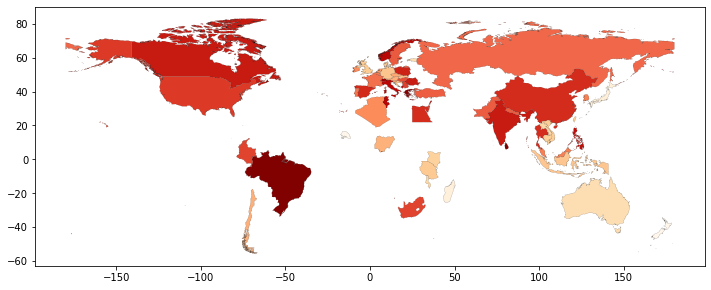

In [48]:
res_geo.plot(figsize=(12, 16), column=res_geo['resistance_scores'], cmap='OrRd',
            edgecolor = 'black',
            linewidth = 0.1)

### lets make it more complete

<AxesSubplot:>

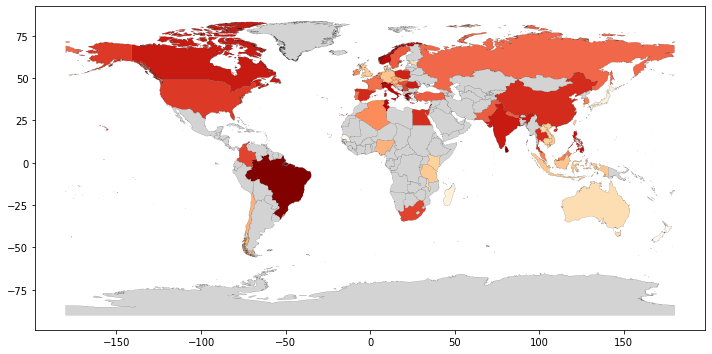

In [49]:
res_geo.plot(figsize=(12, 16), column=res_geo['resistance_scores'], cmap='OrRd', k=6,
            missing_kwds= { 'color' : "lightgrey"},
            edgecolor = 'black',
            linewidth = 0.1)

In [50]:
res_geo = res_geo[res_geo['country'] != 'Antarctica']

<AxesSubplot:>

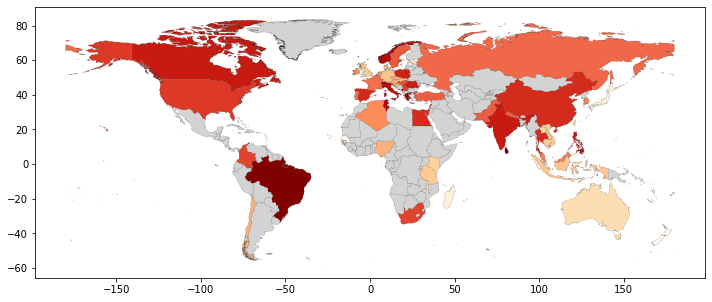

In [51]:
res_geo.plot(figsize=(12, 16), column=res_geo['resistance_scores'], cmap='OrRd', k=6,
            missing_kwds= { 'color' : "lightgrey"},
            edgecolor = 'black',
            linewidth = 0.1)

# Improve the quality
<hr>
<li>key/legend</li>
<li> sensible placment of legend </li>
<li> vibrate colour mapping </li>
<li> removal of border </li>

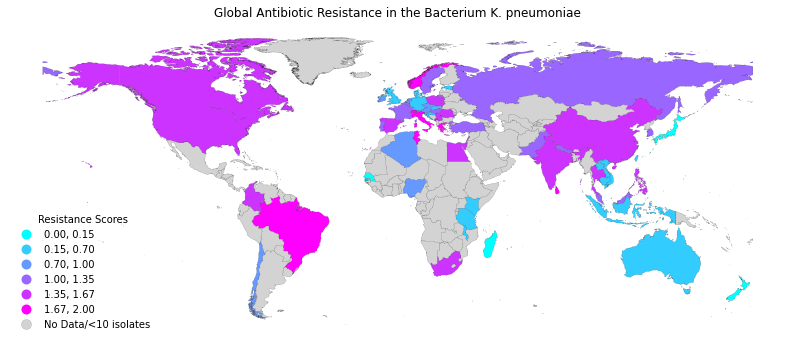

In [52]:
fig, ax = plt.subplots(figsize=(14, 16))

res_geo.plot(ax=ax, figsize=(14, 16), column=res_geo['resistance_scores'], cmap='cool', k=6,
            missing_kwds=dict(color="lightgrey",label='No Data/<10 isolates'),
            scheme='FisherJenks',
            edgecolor = 'black',
            legend=True, 
            linewidth = 0.1,
            legend_kwds=dict(loc='lower left', frameon=False, title='Resistance Scores'))

ax.set(title='Global Antibiotic Resistance in the Bacterium K. pneumoniae')
ax.set_axis_off()


plt.show()

# Thanks for following my coding tutorial

## Read more of my articles on Medium
https://medium.com/@stephenfordham